In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import yfinance as yf
from datetime import datetime

# Importing the dataset

In [2]:
# Set the ticker symbol for Bank Nifty
ticker = "UBER"

# Download the data from Yahoo Finance for a specific date range
data = yf.download(ticker, start="2015-01-01", end=datetime.today())

[*********************100%***********************]  1 of 1 completed


In [3]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-05-10,42.000000,45.000000,41.060001,41.570000,41.570000,186322500
2019-05-13,38.790001,39.240002,36.080002,37.099998,37.099998,79442400
2019-05-14,38.310001,39.959999,36.849998,39.959999,39.959999,46661100
2019-05-15,39.369999,41.880001,38.950001,41.290001,41.290001,36086100
2019-05-16,41.480000,44.060001,41.250000,43.000000,43.000000,38115500
...,...,...,...,...,...,...
2023-05-05,37.480000,37.950001,36.869999,37.750000,37.750000,24676200
2023-05-08,37.820000,38.930000,37.480000,38.830002,38.830002,30992100
2023-05-09,38.490002,38.580002,37.904999,38.189999,38.189999,19387000


# Data Preprocessing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1009 entries, 2019-05-10 to 2023-05-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1009 non-null   float64
 1   High       1009 non-null   float64
 2   Low        1009 non-null   float64
 3   Close      1009 non-null   float64
 4   Adj Close  1009 non-null   float64
 5   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 55.2 KB


In [5]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-05-10,42.000000,45.000000,41.060001,41.570000,41.570000,186322500
2019-05-13,38.790001,39.240002,36.080002,37.099998,37.099998,79442400
2019-05-14,38.310001,39.959999,36.849998,39.959999,39.959999,46661100
2019-05-15,39.369999,41.880001,38.950001,41.290001,41.290001,36086100
2019-05-16,41.480000,44.060001,41.250000,43.000000,43.000000,38115500


In [6]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-05,37.480000,37.950001,36.869999,37.750000,37.750000,24676200
2023-05-08,37.820000,38.930000,37.480000,38.830002,38.830002,30992100
2023-05-09,38.490002,38.580002,37.904999,38.189999,38.189999,19387000
2023-05-10,38.599998,38.950001,38.169998,38.790001,38.790001,19531500
2023-05-11,38.639999,39.180000,38.340000,38.419998,38.419998,16511400


In [7]:
data.shape

(1009, 6)

In [8]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,36.989915,37.741873,36.165763,36.955094,36.955094,2.550263e+07
std,9.566391,9.647018,9.410588,9.509450,9.509450,1.651406e+07
min,15.960000,17.799999,13.710000,14.820000,14.820000,3.380000e+06
25%,30.070000,30.620001,29.410000,30.080000,30.080000,1.574100e+07
50%,34.250000,34.990002,33.549999,34.299999,34.299999,2.176340e+07
75%,43.740002,44.349998,43.009998,43.619999,43.619999,3.038150e+07
max,63.250000,64.050003,60.799999,63.180000,63.180000,1.863225e+08


# Missing values

In [9]:
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
import plotly.express as px
import matplotlib.pyplot as plt

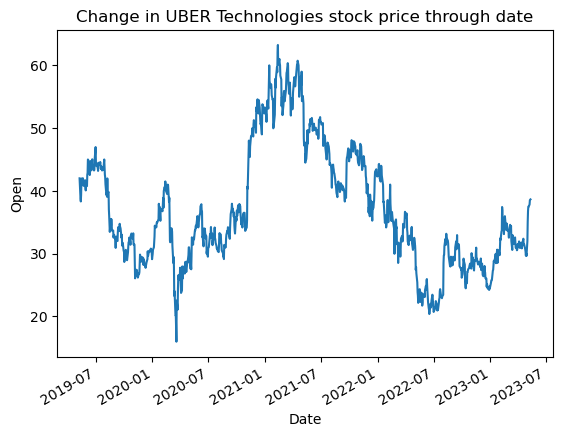

In [11]:

# plot price of gold for each increasing day
data["Open"].plot()
plt.title("Change in UBER Technologies stock price through date")
plt.xlabel("Date")
plt.ylabel("Open")
plt.show()

# Splitting X and Y into taining and testing varaibles

In [12]:
X=data[['Open','High','Low']]
y=data['Close']

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [14]:
X_train.shape,X_test.shape


((756, 3), (253, 3))

In [15]:
y_train.shape,y_test.shape

((756,), (253,))

# Random Forest

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [17]:
regressor = RandomForestRegressor(n_estimators=100)

In [18]:
regressor.fit(X_train,y_train)

RandomForestRegressor()

In [19]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [20]:
print(test_data_prediction)

[50.79139984 47.42129974 31.8653002  42.03080086 22.87730001 57.48670033
 34.38339985 46.62659958 28.41380032 57.5043996  24.78039961 21.51880011
 27.51940001 34.68229961 32.30379938 37.89460026 47.12290028 42.35229965
 26.7145999  36.28680016 44.4878001  36.18680054 43.63749943 30.54969999
 31.88199997 22.92300005 36.16059937 31.6387999  34.2787999  30.91720013
 62.26870022 30.50380045 29.7285     57.59710037 45.71809952 53.99629955
 44.93269928 43.51490044 33.47800079 34.70830051 30.34690035 25.28300007
 30.54460016 51.48279938 60.17709934 37.64000011 29.67719995 34.8228006
 36.64159962 34.17130032 37.35280025 31.91290043 21.39600033 33.10180004
 42.35000004 21.58140005 52.17190033 45.85649948 28.8689999  33.65210087
 28.97159975 52.70249954 36.71479977 30.07429998 27.95080002 30.58159981
 42.83490051 50.93969948 57.60720024 37.27840034 33.63639996 60.33279995
 32.84740078 34.18779991 40.18179974 38.01859997 53.02850018 60.2688002
 35.05330048 30.38280029 42.64600025 50.79699982 27.0

In [21]:
# R squared errorY
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9968109962735702


In [22]:
y_test=list(y_test)

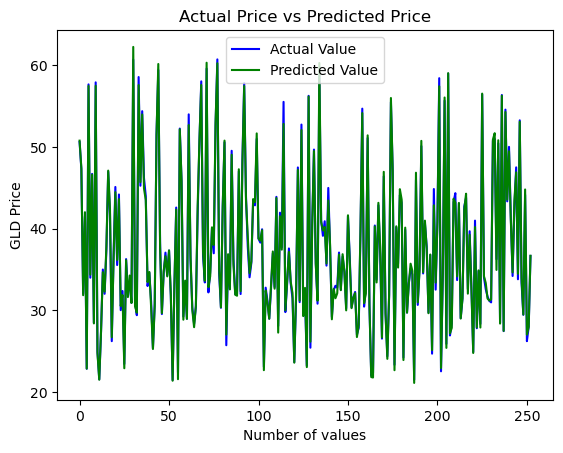

In [23]:
plt.plot(y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

# Training the model using linear regression

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
model=LinearRegression()


In [26]:
model.fit(X_train,y_train)

LinearRegression()

In [27]:
y_pred = model.predict(X_test)

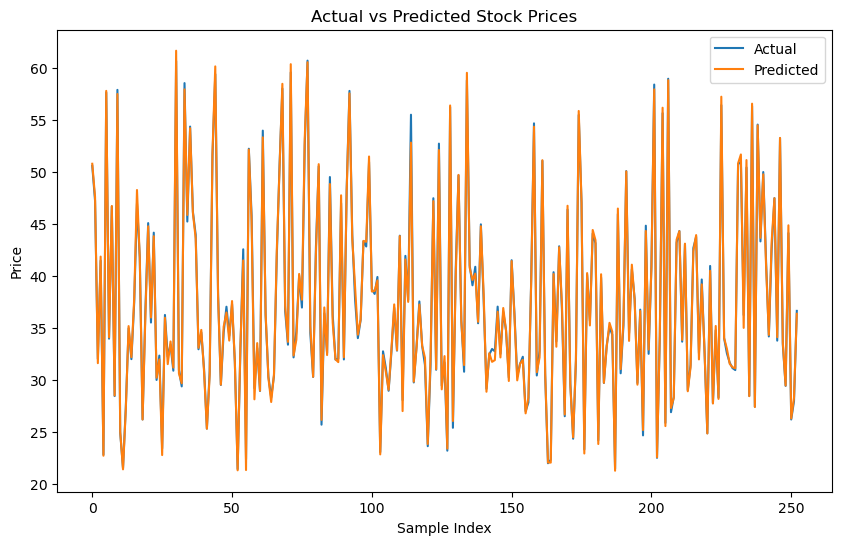

In [28]:
# Visualize the actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.show()

In [29]:
reg=LinearRegression()
reg.fit(X,y)

LinearRegression()

In [30]:
prediction=reg.predict(X)

In [31]:
prediction

array([43.71000876, 37.11453258, 38.53971447, ..., 38.08506448,
       38.52202916, 38.81338503])

In [32]:
Open=float(input("enter a value"))
High=float(input("enter a value"))
Low=float(input("enter a value"))

data = np.array([[Open,High,Low]])
pred_value = model.predict(data)[0]

print(pred_value)

enter a value2342
enter a value435
enter a value234
-801.0773545273101


C:\Users\reham\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [34]:
import pickle
file=open("UBER_model.pkl",'wb')
pickle.dump(model,file)